In [1]:
import pandas as pd
import numpy as np
import re
import missingno as msno
%matplotlib inline

from unidecode import unidecode

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
from listes import *

In [3]:
# Chargement du dataset complet (320772, 162)
#data = pd.read_csv('./data/fr.openfoodfacts.org.products.csv', delimiter='\t', low_memory=False)

In [4]:
# Création d'un extrait du dataset pour charger et expérimenter plus rapidement
#data_petit = data.iloc[np.random.randint(0, len(data), 50000)]
#data_petit.to_csv("./data/data_petit.csv")

In [5]:
# Chargement du dataset version réduite (50000 valeurs pour les tests)
data = pd.read_csv("./data/data_petit.csv", low_memory=False)

In [6]:
data = data.loc[:, listeColones]

In [7]:
data.head()

,code,product_name,image_url,categories_tags,pnns_groups_1,pnns_groups_2,ingredients_text,additives_n,additives,additives_tags,...,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,quantity,brands,brands_tags,categories,main_category,main_category_fr,energy-from-fat_100g,alcohol_100g
0,4311501391952,Paprika,http://fr.openfoodfacts.org/images/products/43...,"en:plant-based-foods-and-beverages,en:plant-ba...",Fruits and vegetables,Vegetables,"34% Paprika grün, 33% Paprika rot, 33% Paprika...",0.0,[ 34-paprika-grun -> de:34-paprika-grun ] [...,NaN,...,NaN,-6.0,1000 g,Edeka,edeka,Sweet Peppers,en:fresh-vegetables,Légumes frais,NaN,NaN
1,4260140893016,Habañero Käse Kessel Chips,NaN,"en:salty-snacks,en:appetizers,en:chips-and-fri...",Salty snacks,Appetizers,"Kartoffeln, Sonnenblumenöl, Speisesalz, Zucker...",1.0,[ kartoffeln -> de:kartoffeln ] [ sonnenblu...,en:e330,...,NaN,14.0,125 g,Pepper-King,pepper-king,Kartoffelchips,en:chips-and-fries,Chips et frites,NaN,NaN
2,0078742433042,Sweetened Condensed Milk,NaN,NaN,NaN,NaN,"Milk, sugar",0.0,[ milk -> en:milk ] [ sugar -> en:sugar ],NaN,...,NaN,19.0,NaN,Great Value,great-value,NaN,NaN,NaN,NaN,NaN
3,6942836700218,HERSHEY'S KISSES 扁桃仁牛奶巧克力,http://fr.openfoodfacts.org/images/products/69...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95g,HERSHEY'S,hershey-s,NaN,NaN,NaN,NaN,NaN
4,0025315248701,"Marie Sharp's, Orange Pulp Habanero Pepper Sau...",NaN,NaN,NaN,NaN,"Select yellow habanero peppers, orange pulp, o...",0.0,[ select-yellow-habanero-peppers -> en:select...,NaN,...,NaN,19.0,NaN,Melinda's Limited,melinda-s-limited,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Fichier de dimension " + str(data.shape) + " :\n")

print("\n\nType des colonnes :")
print(data.dtypes.to_markdown())

print("\n\nTaux de remplissage (%) :")
print(((1- data.isna().mean())*100).to_markdown())

print("\n\nNombre de valeurs uniques par colones :")
print(data.nunique().to_markdown())

Fichier de dimension (50000, 36) :



Type des colonnes :
|                                            | 0       |
|:-------------------------------------------|:--------|
| code                                       | object  |
| product_name                               | object  |
| image_url                                  | object  |
| categories_tags                            | object  |
| pnns_groups_1                              | object  |
| pnns_groups_2                              | object  |
| ingredients_text                           | object  |
| additives_n                                | float64 |
| additives                                  | object  |
| additives_tags                             | object  |
| ingredients_from_palm_oil_n                | float64 |
| ingredients_from_palm_oil_tags             | object  |
| ingredients_that_may_be_from_palm_oil_n    | float64 |
| ingredients_that_may_be_from_palm_oil_tags | object  |
| nutrition_grade_fr          

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
additives_n,38799.0,1.915977,2.469736,0.0,0.000000,1.000000,3.0000,31.0
ingredients_from_palm_oil_n,38799.0,0.020361,0.142507,0.0,0.000000,0.000000,0.0000,2.0
ingredients_that_may_be_from_palm_oil_n,38799.0,0.052630,0.259989,0.0,0.000000,0.000000,0.0000,4.0
energy_100g,40625.0,1130.678208,912.849972,0.0,375.000000,1111.000000,1674.0000,87217.0
fat_100g,37994.0,12.758555,17.496286,0.0,0.000000,5.170000,20.1800,100.0
saturated-fat_100g,35780.0,5.097034,7.801602,0.0,0.000000,1.800000,7.1400,100.0
monounsaturated-fat_100g,3517.0,10.186628,16.407891,0.0,0.200000,4.050000,10.4200,82.0
polyunsaturated-fat_100g,3524.0,6.567581,11.210848,0.0,0.000000,2.300000,7.3500,73.0
omega-3-fat_100g,152.0,2.435632,3.617312,0.0,0.422750,1.550000,2.8250,34.0
sugars_100g,38151.0,16.064485,21.308885,0.0,1.300000,5.700000,24.0000,134.0


In [10]:
# Fonction pour détecter combien de colonnes contiennent une valeurs quand l'autre n'en a pas
def same_filling(data, c1, c2, affiche=True):
    mask  = data.loc[:, c1].isna()
    mask ^= data.loc[:, c2].isna()
    
    if not affiche:
        return mask
    
    nb = mask.sum()
    
    print("\nIl y a en tout", nb, "lignes différentes entre", c1, "et", c2, ".")
    if nb>0:
        dataSelect = data.loc[mask]
        print("Sur ces colonnes,", c1, "contient", dataSelect[c1].notna().sum(), "valeurs.")
        print("Et", c2, "contient", dataSelect[c2].notna().sum(), "valeurs.\n")
        print(dataSelect.loc[:, [c1, c2]].head(5))

In [11]:
@interact
def show_articles_more_than(column=list(data.columns), x=(0, 300, 1)):
    tmp = data.loc[~data[column].isna(), column]
    return tmp.iloc[x:x+20]

interactive(children=(Dropdown(description='column', options=('code', 'product_name', 'image_url', 'categories…

In [12]:
@interact
def show_articles_more_than(column=list(data.columns)):
    return data[column].describe()

interactive(children=(Dropdown(description='column', options=('code', 'product_name', 'image_url', 'categories…

In [13]:
for c in data.loc[:, 'fat_100g':'fruits-vegetables-nuts_100g'].columns:
    print(data.loc[~((data[c]<=100) & (data[c]>=0) | data[c].isna()), ['product_name', c]])

Empty DataFrame
Columns: [product_name, fat_100g]
Index: []
Empty DataFrame
Columns: [product_name, saturated-fat_100g]
Index: []
Empty DataFrame
Columns: [product_name, monounsaturated-fat_100g]
Index: []
Empty DataFrame
Columns: [product_name, polyunsaturated-fat_100g]
Index: []
Empty DataFrame
Columns: [product_name, omega-3-fat_100g]
Index: []
         product_name  sugars_100g
10129  Tomato Ketchup        134.0
28633  Agavendicksaft        103.5
Empty DataFrame
Columns: [product_name, fiber_100g]
Index: []
                                   product_name  proteins_100g
142    Gourmet Blends, Seasoning, Garlic Pepper        -500.00
28750                             Whole Cashews          -3.57
31177                             Whole Cashews          -3.57
                                            product_name    salt_100g
4      Marie Sharp's, Orange Pulp Habanero Pepper Sau...    594.86800
1132                              Flower Of Salt, Smoked    108.71200
1734                 

In [14]:
dataClean = data.copy()

<AxesSubplot: >

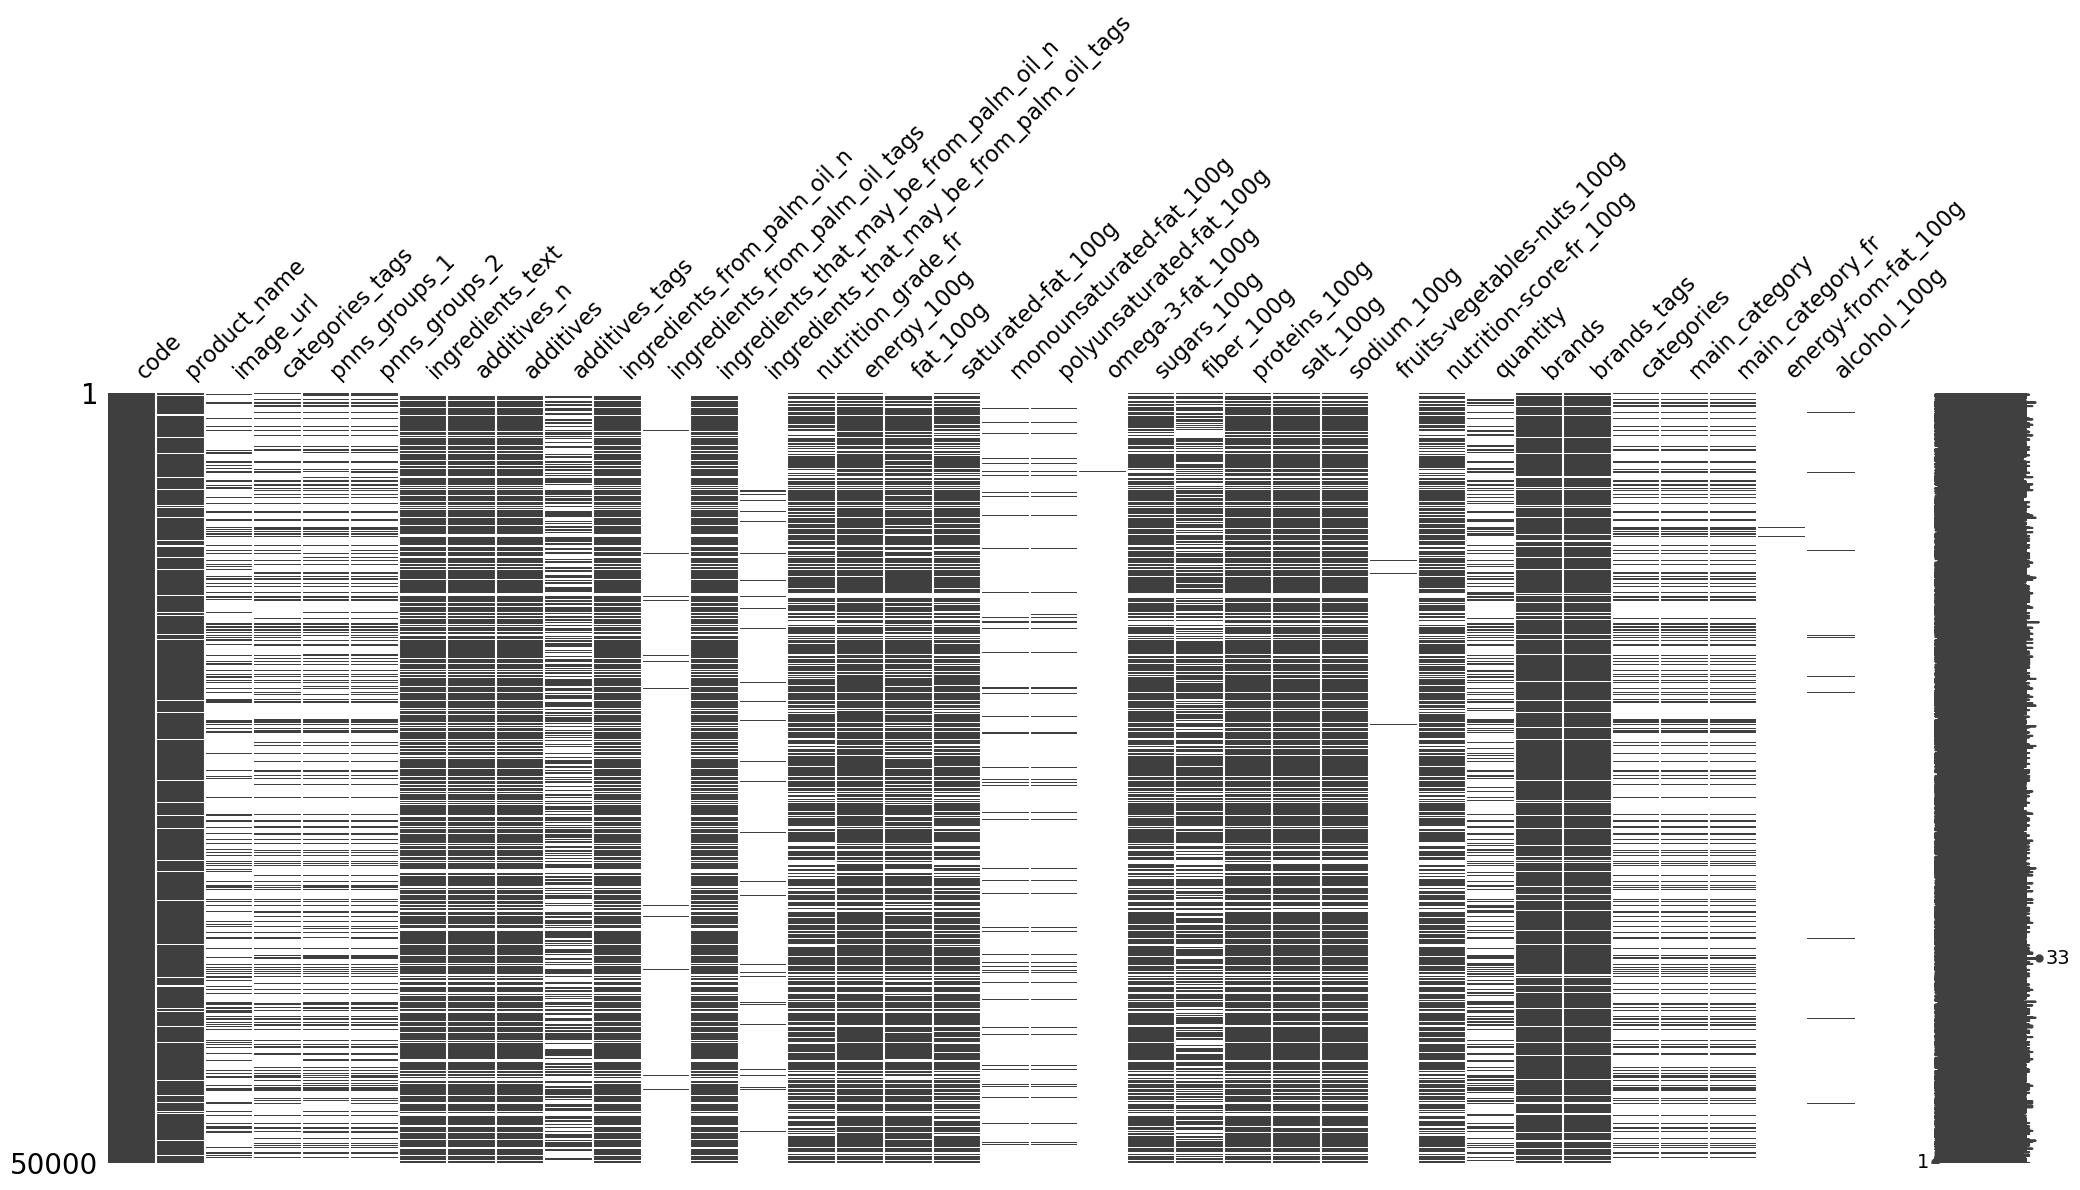

In [15]:
msno.matrix(dataClean)

<AxesSubplot: >

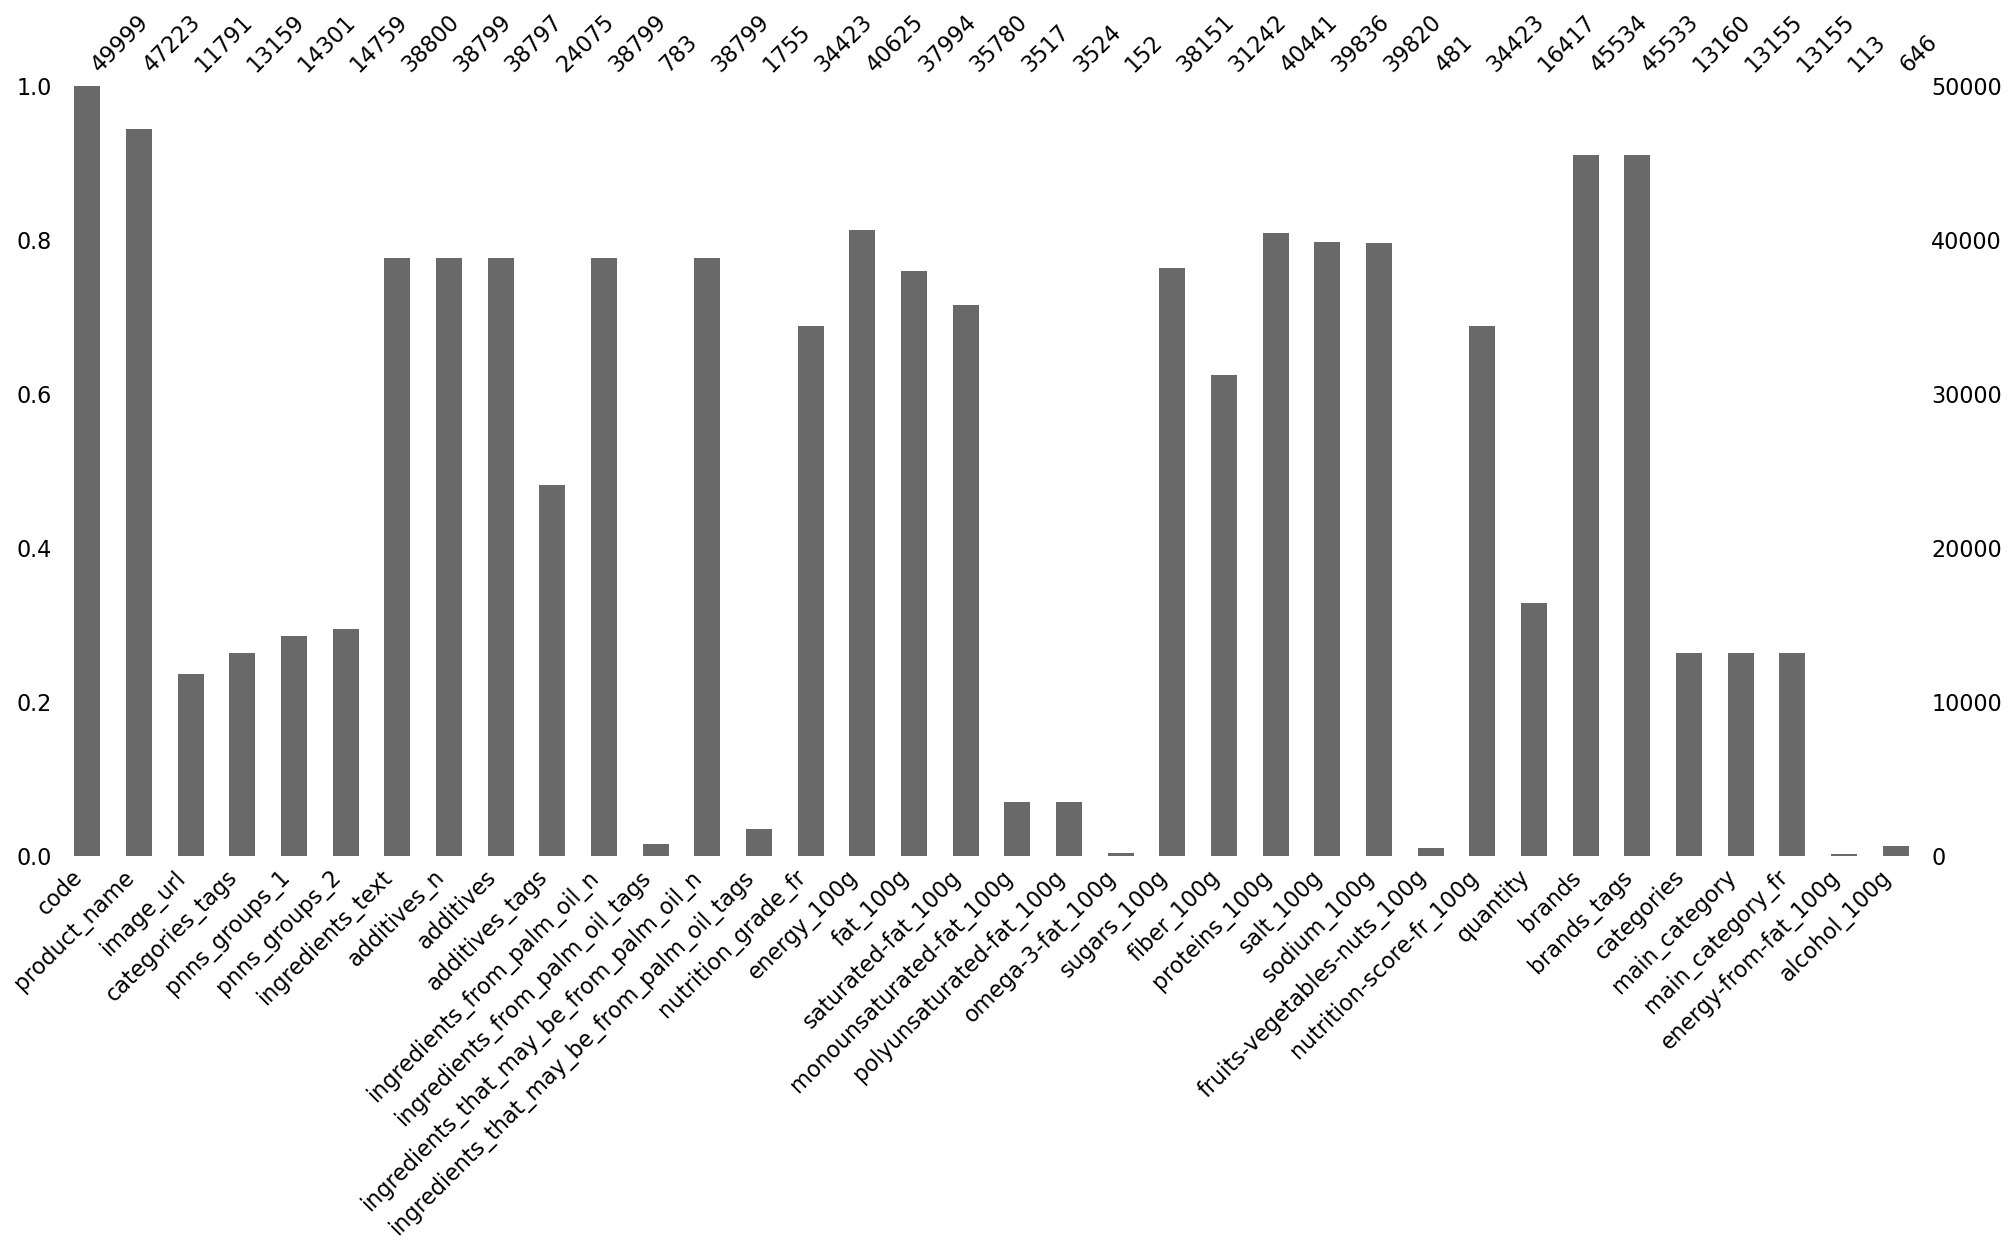

In [16]:
msno.bar(dataClean)

<AxesSubplot: >

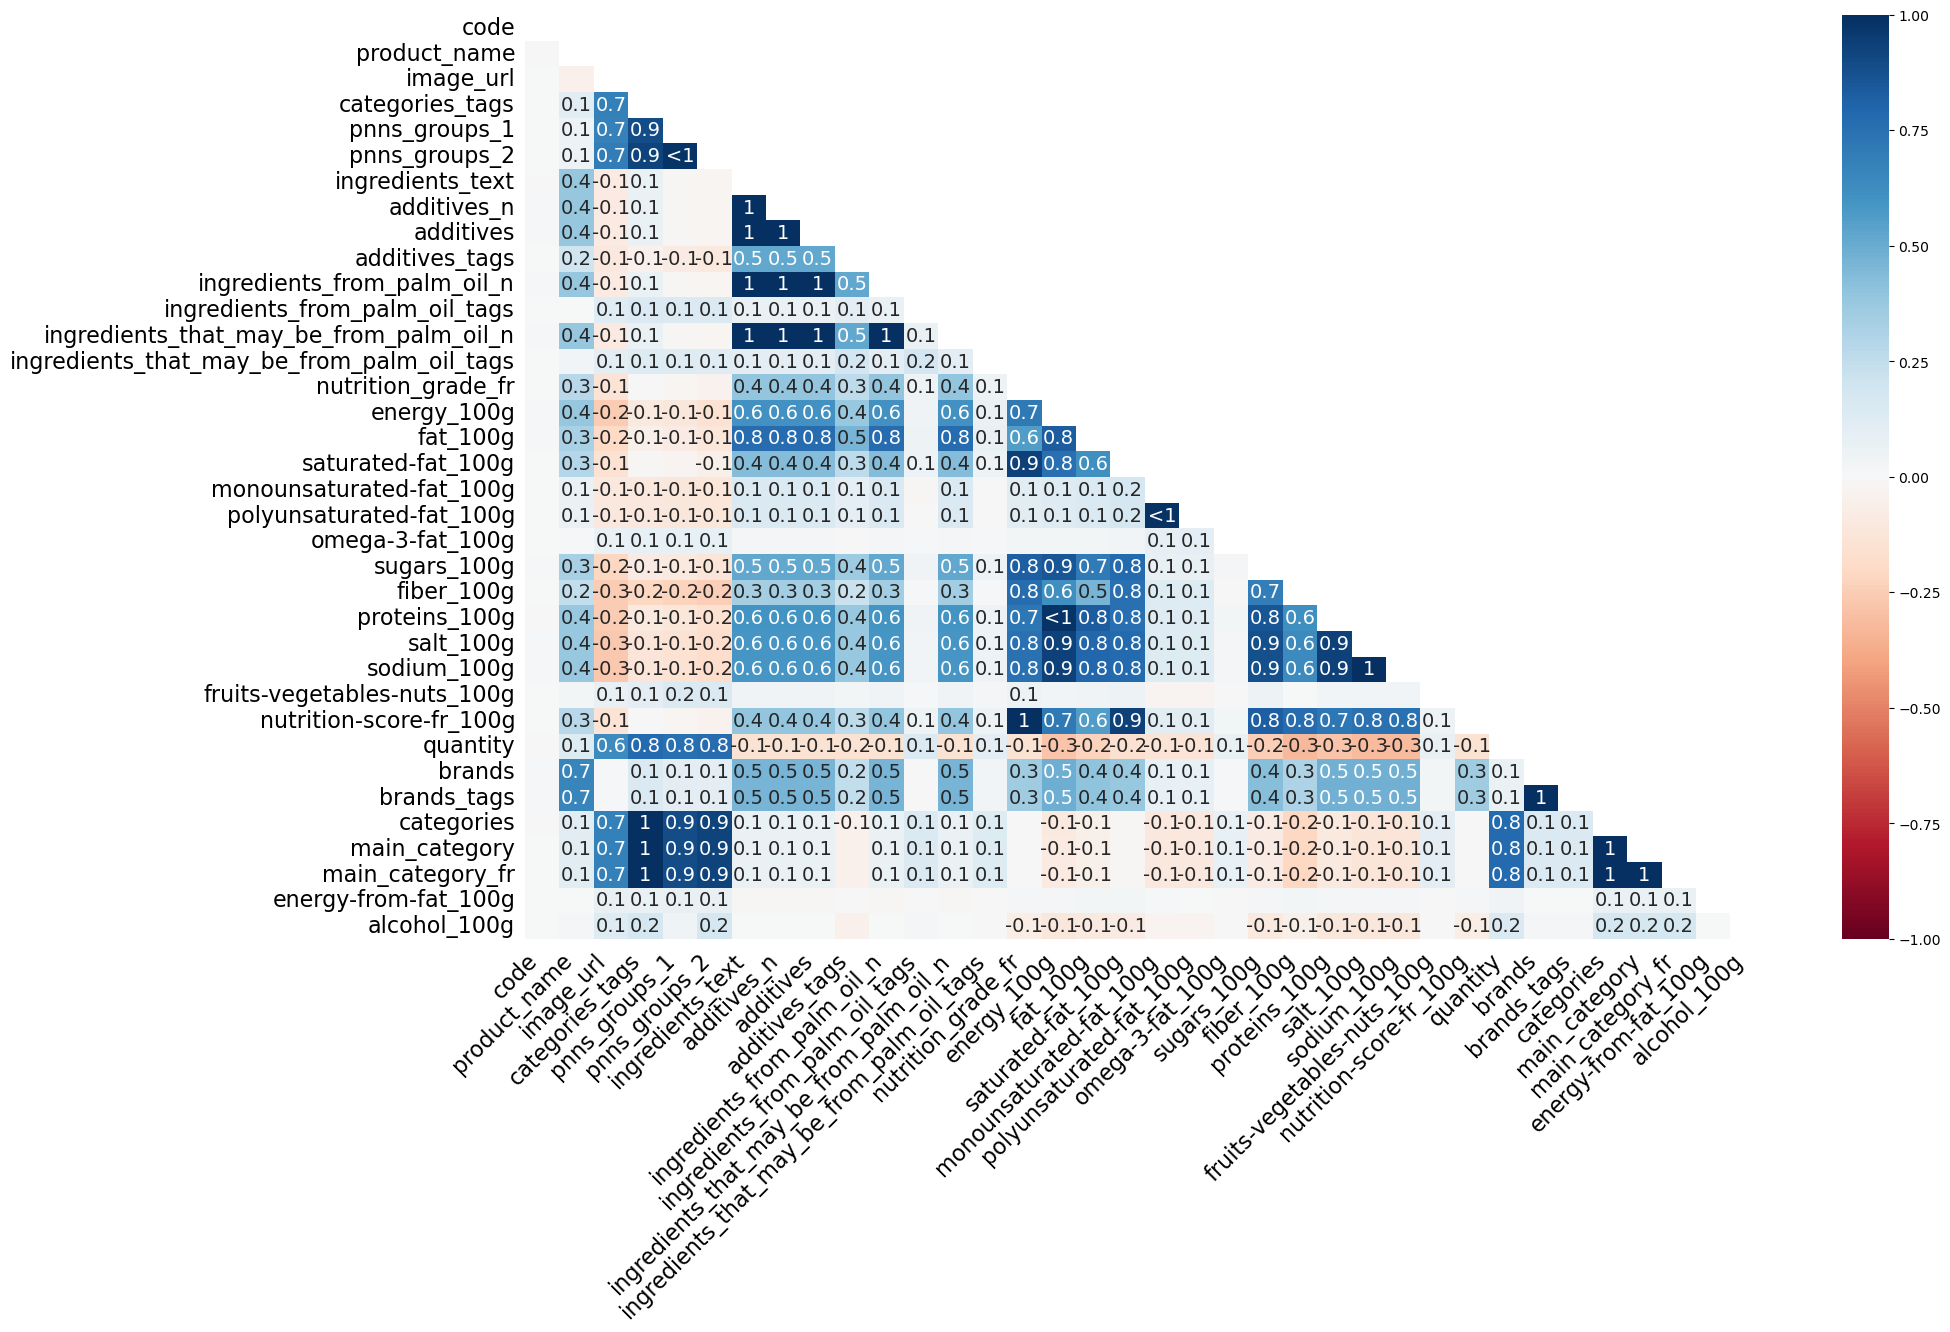

In [17]:
msno.heatmap(dataClean)

<AxesSubplot: >

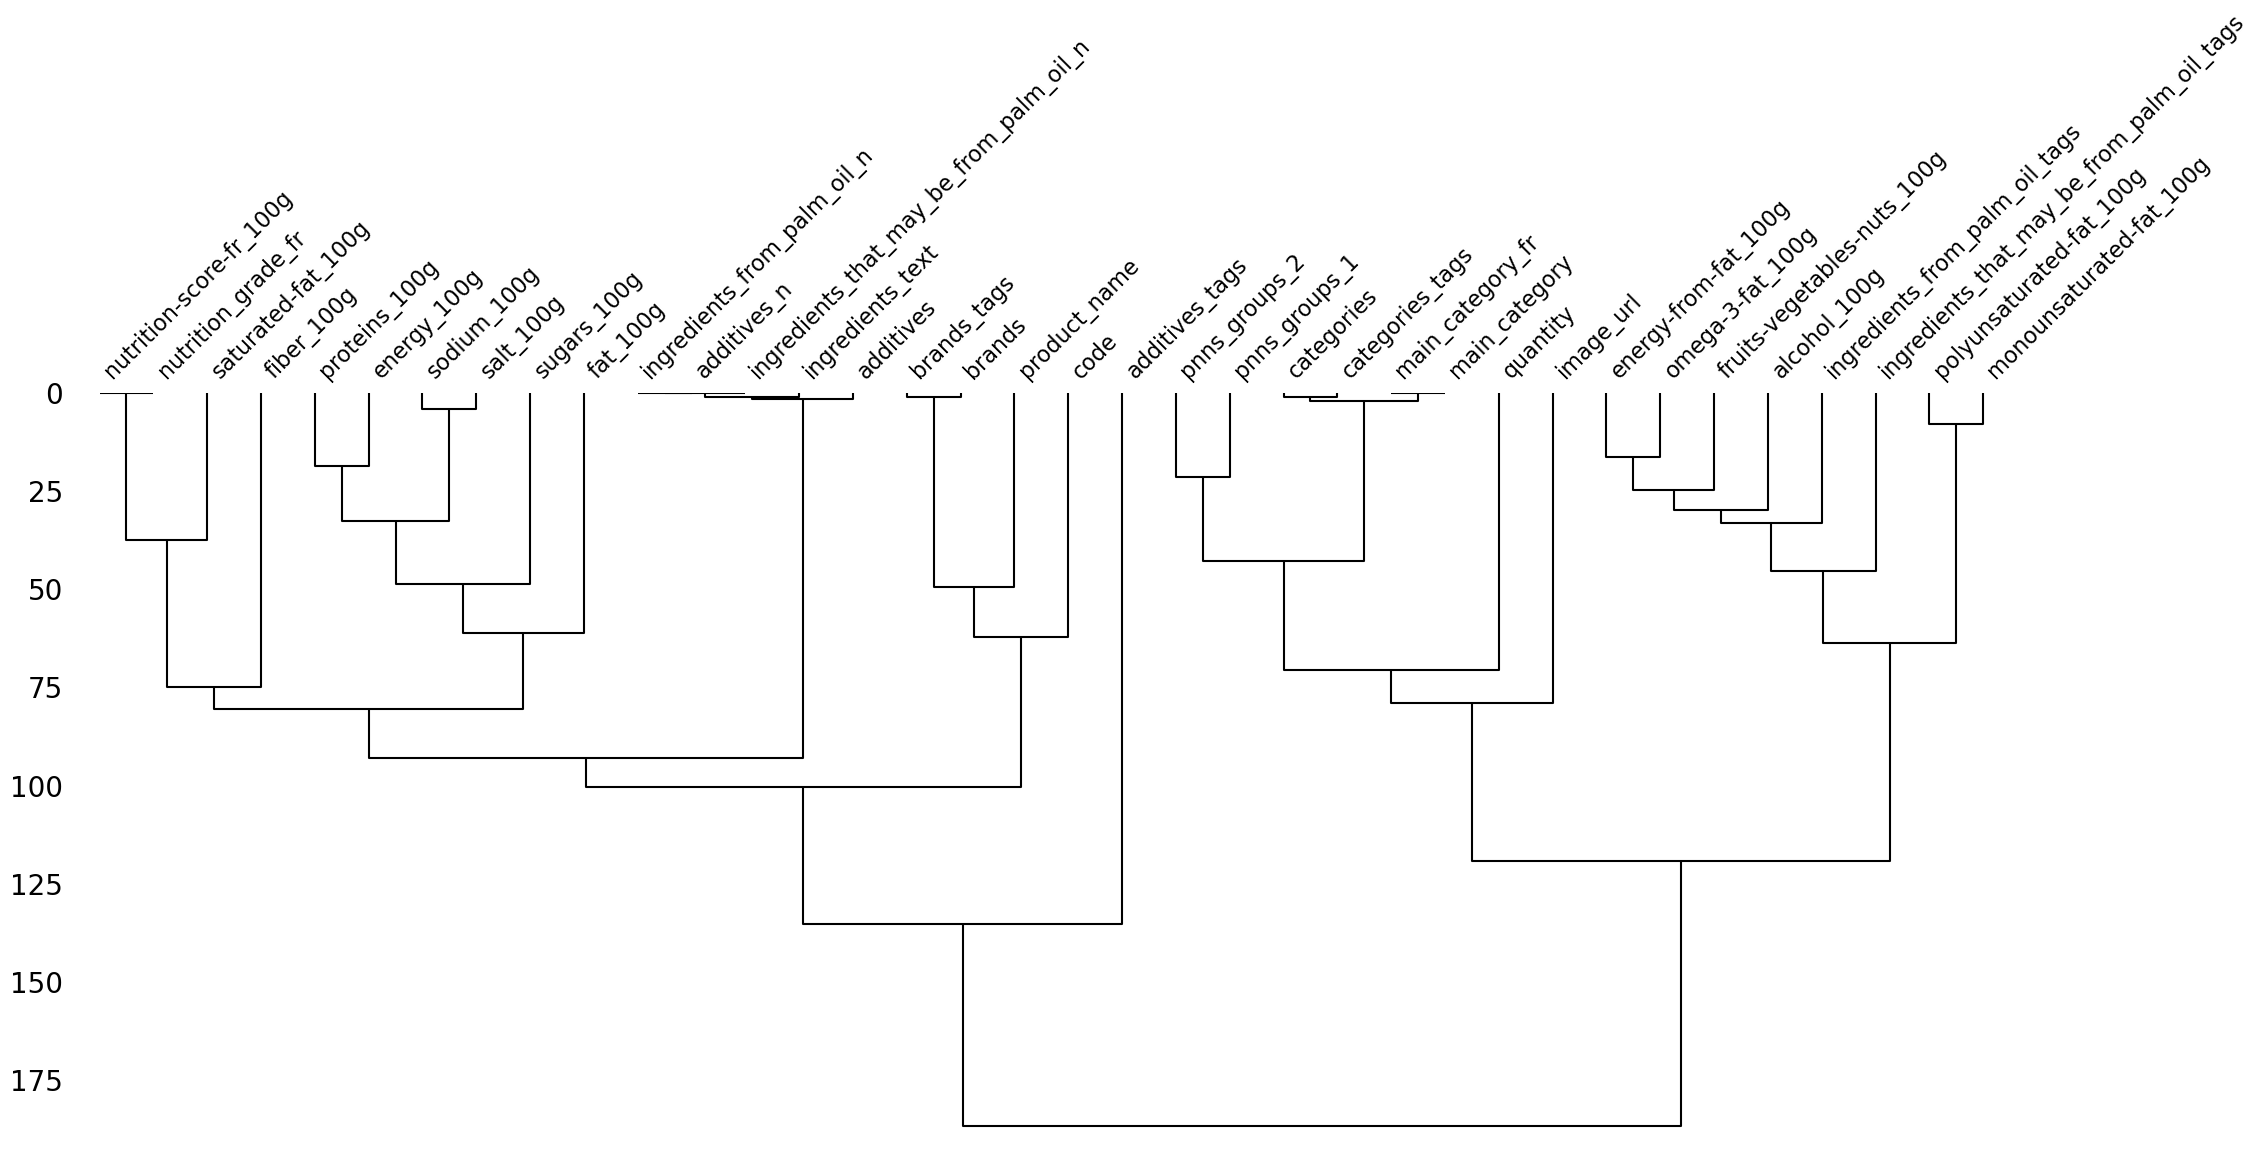

In [18]:
msno.dendrogram(dataClean)

In [19]:
# Suppression des donnnées nutritionelles abérantes
for c in ['fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'alcohol_100g', 'fruits-vegetables-nuts_100g']:
    dataClean.loc[(dataClean[c]>100) | (dataClean[c]<0), c] = np.NaN

In [20]:
# Modification des erreurs d'unité
for c in ['salt_100g', 'sodium_100g']:
    dataClean.loc[(dataClean[c]<0), c] = np.NaN
    dataClean.loc[(dataClean[c]>10), c] = dataClean.loc[(dataClean[c]>0), c]/1000

In [21]:
@interact
def show_articles_more_than(column=list(dataClean.columns)):
    return dataClean[column].plot.box()

interactive(children=(Dropdown(description='column', options=('code', 'product_name', 'image_url', 'categories…

In [22]:
# Vérification des incohérences entre les colonnes avec et sans tag
for c in list(dataClean.columns):
    if c.endswith('_tags') and c[:-5] in dataClean.columns:
        same_filling(dataClean, c, c[:-5])


Il y a en tout 1 lignes différentes entre categories_tags et categories .
Sur ces colonnes, categories_tags contient 0 valeurs.
Et categories contient 1 valeurs.

      categories_tags       categories
23660             NaN  125g - 1 Yaourt

Il y a en tout 14722 lignes différentes entre additives_tags et additives .
Sur ces colonnes, additives_tags contient 0 valeurs.
Et additives contient 14722 valeurs.

  additives_tags                                          additives
0            NaN   [ 34-paprika-grun -> de:34-paprika-grun  ]  [...
2            NaN      [ milk -> en:milk  ]  [ sugar -> en:sugar  ] 
4            NaN   [ select-yellow-habanero-peppers -> en:select...
5            NaN   [ pure-xylitol-powder -> en:pure-xylitol-powd...
9            NaN                          [ garlic -> en:garlic  ] 

Il y a en tout 1 lignes différentes entre brands_tags et brands .
Sur ces colonnes, brands_tags contient 0 valeurs.
Et brands contient 1 valeurs.

      brands_tags brands
36885    

In [23]:
# Liste des colonnes avec tag
listeTags = pd.Series(dataClean.columns).loc[dataClean.columns.str.endswith('_tags')]

In [24]:
# Suppression des lignes sans code (impossible à utiliser)
dataClean = dataClean.loc[~dataClean['code'].isna()]
# Et vérification que les codes sont bien uniques (True  = oui)
len(dataClean.loc[dataClean['code'].duplicated()]) == 0

False

In [25]:
# Reformate additives et remplis additives_tags
dataClean['additives_tags'] = dataClean['additives'].str.replace(r'\[[^\]>]*> ([a-z]{2}:[a-z0-9\-]+)[^\]]*\] *', r'\1,', regex=True)
dataClean['additives'] = dataClean['additives'].str.replace(r'\[ *([a-z0-9\-]+)[^\[]*', r'\1,', regex=True)

In [26]:
# Met à NaN toutes les lignes dont tag est NaN (car c'est que la valeur nontag n'est pas valide)
for c1 in listeTags:
    c2 = c1[:-5]
    dataClean.loc[dataClean[c1].isna(), c2] = np.NaN
    if c2 in ['brands']: #Et pour brands on peut même faire l'inverse
        dataClean.loc[dataClean[c2].isna(), c1] = np.NaN

In [27]:
# Normalise un texte pour en faire un tag
def to_tag(s):
    s = s.lower().strip()
    s = re.sub(r"( +|\')",'\-', s)
    s = re.sub(r'[^\w\s\-]','', s)
    s = unidecode(s)
    return s

In [28]:
tagToText = {'huile-de-palme': 'Huile de palme'}

# Transforme un tag en texte
def to_text(s):
    oldS = s
    if s in tagToText:
        return tagToText[s]
    
    s = s.replace('-', ' ')
    s = s.capitalize()
    tagToText[oldS] = s
    return s

In [29]:
# Ajout de la version humaine des tags
for c1 in ['ingredients_that_may_be_from_palm_oil_tags', 'ingredients_from_palm_oil_tags']:
    c2 = c1[:-5]
    mask = same_filling(dataClean, c1, c2, affiche=False)
    
    dataClean.loc[mask, c2] = dataClean.loc[mask, c1].str.split(',').apply(lambda t : ', '.join([to_text(x) for x in t]))

In [30]:
dataClean.columns

Index(['code', 'product_name', 'image_url', 'categories_tags', 'pnns_groups_1',
       'pnns_groups_2', 'ingredients_text', 'additives_n', 'additives',
       'additives_tags', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'omega-3-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g',
       'nutrition-score-fr_100g', 'quantity', 'brands', 'brands_tags',
       'categories', 'main_category', 'main_category_fr',
       'energy-from-fat_100g', 'alcohol_100g', 'ingredients_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil'],
      dtype='object')

In [31]:
for c in dataClean.columns:
    if c.endswith('_100g'):
        dataClean[c]

In [32]:
#dataClean['energy_100g'].plot(kind='box')

min_threshold,max_threshold = dataClean['energy_100g'].quantile([0.01,0.99])
print(min_threshold,max_threshold)

dataClean[(dataClean['energy_100g']<min_threshold)|(dataClean['energy_100g']>max_threshold)][['code', 'fat_100g','energy_100g']].sort_values(by='energy_100g')

0.0 3347.0


,code,fat_100g,energy_100g
1009,0073210000115,93.3,3350.0
9778,8000010005141,91.0,3367.0
10567,7617027815697,91.0,3367.0
22983,8000010005141,91.0,3367.0
36599,4260014351000,91.0,3367.0
...,...,...,...
37702,3700640470139,33.0,7029.0
14057,7613312066638,NaN,8400.0
38277,3303640001404,28.9,9050.0
31776,2107391007453,27.0,16000.0


<AxesSubplot: >

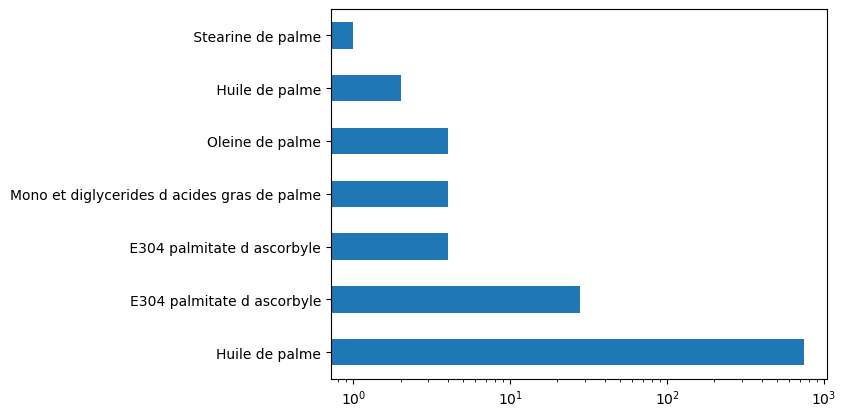

In [33]:
dataClean.loc[:, 'ingredients_from_palm_oil'].str.split(',', expand = True).stack().value_counts().plot(kind='barh', logx=True)

<AxesSubplot: >

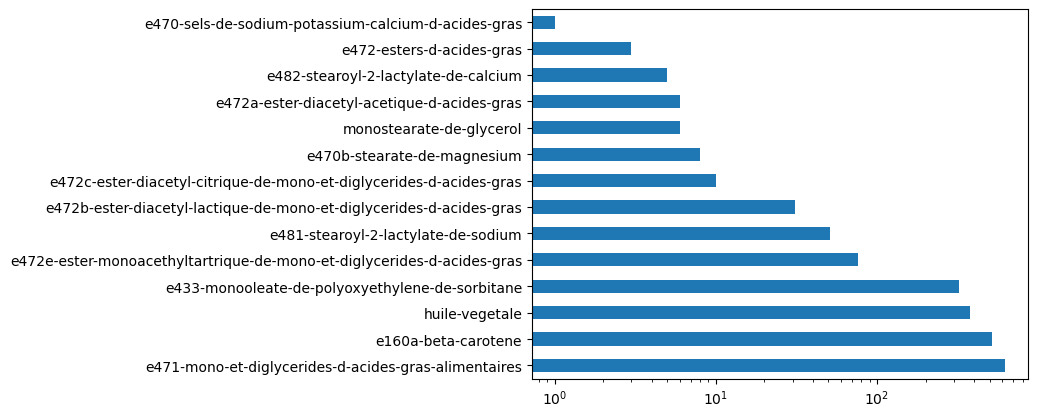

In [34]:
dataClean['ingredients_that_may_be_from_palm_oil_tags'].str.split(',', expand = True).stack().value_counts().plot(kind='barh', logx=True)

In [35]:
dataClean.loc[dataClean['brands_tags'].fillna('').str.contains(','), ['brands_tags', 'brands']]

,brands_tags,brands
14,"lucky-leaf,knouse-foods-inc","Lucky Leaf, Knouse Foods Inc."
18,"alsa,unilever","Alsa,Unilever"
28,"ferial,marque-repere","Férial,Marque Repère"
39,"prince,new-world-pasta-company","Prince, New World Pasta Company"
41,"imperial-nuts,star-snacks-co-inc","Imperial Nuts, Star Snacks Co. Inc."
...,...,...
49983,"whole-foods-market,harry-s-farmers-market-ltd","Whole Foods Market, Harry's Farmers Market Ltd."
49986,"signature-kitchens,safeway-inc","Signature Kitchens, Safeway Inc."
49990,"migros-excellence-elsa,elsa","Migros Excellence Elsa, Elsa"
49996,"sainsbury-s,sainsbury-s-taste-the-difference","Sainsbury's, Sainsbury's Taste the Difference"
